Geoinformatik 2 – GIS-Analyse
# Übung 8: Punktmusteranalyse mit Ripley Funktionen
Prof. Dr. Yu Feng

## Lernziele
- Reale räumliche Punktmuster analysieren (Flickr Nutzerfotos)
- Beobachtete Muster mit CSR und regulären Referenzen vergleichen
- Ripley's G, F, K, L Funktionen anwenden

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pointpats import distance_statistics, random

# Set random seed for reproducibility
np.random.seed(42)

In [68]:
# Lade Tokyo Flickr Fotodaten
db = pd.read_csv("../Uebung7/data/tokyo_clean.csv")
print(f"Gesamtanzahl Datensätze: {len(db)}")
db.head(3)

Gesamtanzahl Datensätze: 10000


,user_id,longitude,latitude,date_taken,photo/video_page_url,x,y
0,10727420@N00,139.700499,35.674000,2010-04-09 17:26:25.0,http://www.flickr.com/photos/10727420@N00/4545...,1.555139e+07,4.255856e+06
1,8819274@N04,139.766521,35.709095,2007-02-10 16:08:40.0,http://www.flickr.com/photos/8819274@N04/26503...,1.555874e+07,4.260667e+06
2,62068690@N00,139.765632,35.694482,2008-12-21 15:45:31.0,http://www.flickr.com/photos/62068690@N00/3125...,1.555864e+07,4.258664e+06


In [69]:
# Extrahiere Koordinaten für spezifischen Nutzer (aktivster Fotograf)
user = db.query('user_id == "95795770@N00"')
coordinates = user[["x", "y"]].values
print(f"Nutzerfotos: {len(user)}")
print(f"Koordinaten-Shape: {coordinates.shape}")

Nutzerfotos: 419
Koordinaten-Shape: (419, 2)


## Erzeugung von Referenzmustern: CSR und Regulär

Wir vergleichen das beobachtete Muster (Flickr Nutzer `95795770@N00`) mit:
1. **CSR (Complete Spatial Randomness)** - Poisson-Zufallsprozess
2. **Reguläres Muster** - Gitter mit kleinem Rauschen zur Vermeidung von Artefakten

Ziel: Ripley G/F/K/L Funktionen nutzen, um Unterschiede zwischen Clusterung, Regularität und Zufälligkeit zu analysieren.
Referenz: Geographic Data Science Book - Point Pattern Analysis.

In [70]:
# Erzeuge Referenzmuster

# Bounding Box aus beobachteten Koordinaten
x_min, x_max = coordinates[:,0].min(), coordinates[:,0].max()
y_min, y_max = coordinates[:,1].min(), coordinates[:,1].max()
width = x_max - x_min
height = y_max - y_min

n_points_obs = coordinates.shape[0]
print(f"Beobachtet: {n_points_obs} Punkte")

# CSR: Poisson-Zufallsprozess innerhalb Bounding Box
random_pattern = random.poisson(coordinates, size=n_points_obs)
print(f"CSR erzeugt: {len(random_pattern)} Punkte")

# Regulär: Gitter mit Rauschen zur Vermeidung von Stufenartefakten in Ripley-Funktionen
n_side = int(np.ceil(np.sqrt(n_points_obs)))
x_regular = np.linspace(x_min, x_max, n_side)
y_regular = np.linspace(y_min, y_max, n_side)
xx, yy = np.meshgrid(x_regular, y_regular)
regular_all = np.column_stack([xx.ravel(), yy.ravel()])
regular_pattern = regular_all[:n_points_obs]
# Füge kleines Rauschen hinzu (0.5% der min. Dimension) um perfekte Regularität zu brechen
noise = np.random.normal(0, 0.005 * min(width, height), size=regular_pattern.shape)
regular_pattern = regular_pattern + noise
print(f"Regulär erzeugt: {len(regular_pattern)} Punkte (Gitter + Rauschen)")

Beobachtet: 419 Punkte
CSR erzeugt: 419 Punkte
Regulär erzeugt: 419 Punkte (Gitter + Rauschen)


## Visualisierung der Muster

Räumliche Verteilung aller drei Muster: Beobachtet, CSR Zufällig und Reguläres Gitter.

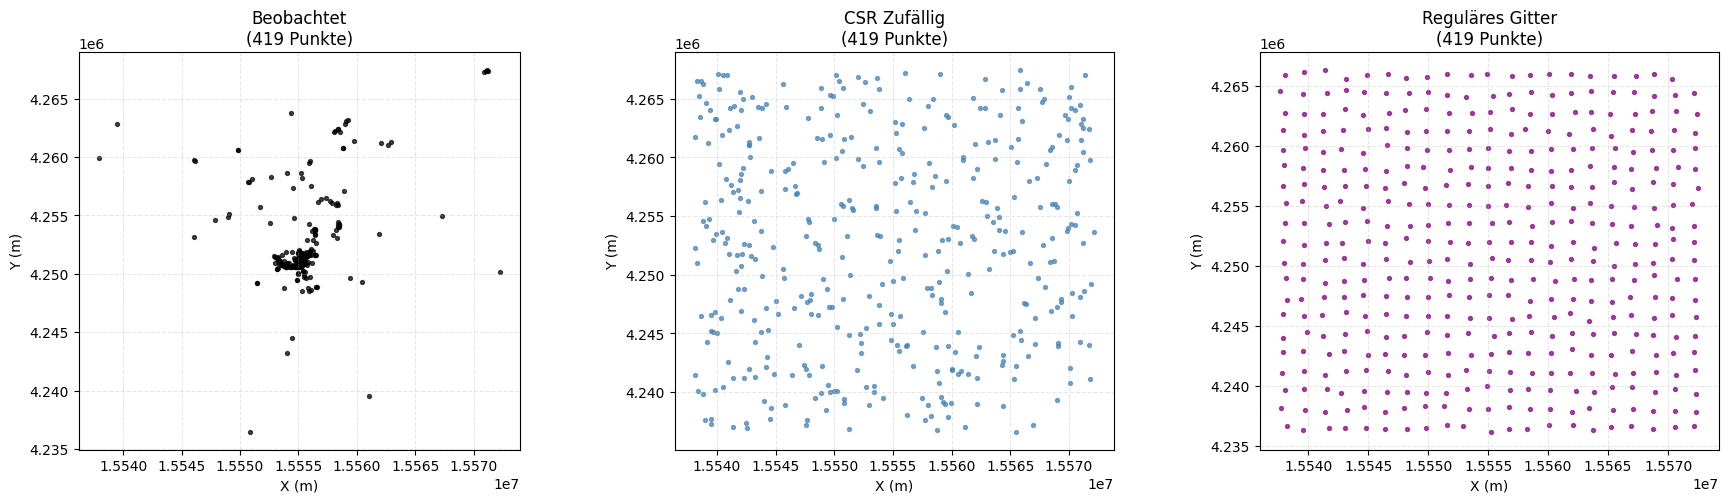

In [71]:
# Visualisierung: Beobachtet vs CSR vs Regulär
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
patterns = [
    (coordinates, "Beobachtet", "black", axes[0]),
    (random_pattern, "CSR Zufällig", "steelblue", axes[1]),
    (regular_pattern, "Reguläres Gitter", "purple", axes[2]),
]

for pts, title, color, ax in patterns:
    ax.scatter(pts[:,0], pts[:,1], s=8, color=color, alpha=0.7)
    ax.set_aspect('equal')
    ax.set_title(f"{title}\n({len(pts)} Punkte)")
    ax.set_xlabel('X (m)')
    ax.set_ylabel('Y (m)')
    ax.grid(alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig('pic/observed_csr_regular.png', dpi=150)
plt.show()

## Ripley G-Funktions-Vergleich

Die G-Funktion analysiert die Verteilung der Nächster-Nachbar-Abstände. Anstiegsgeschwindigkeit von G(d):
- **Schneller Anstieg** → Geclustertes Muster
- **Langsamer Anstieg** → Reguläres/verteiltes Muster
- **Moderater Anstieg** → Zufälliges Muster (CSR)

**Hinweis:** Verwenden Sie `distance_statistics` aus der pointpats-Bibliothek, um die verschiedenen Ripley-Funktionen zu berechnen. Dokumentation: https://pysal.org/pointpats/generated/pointpats.g_test.html

Berechne G-Funktionen...
Fertig
Fertig


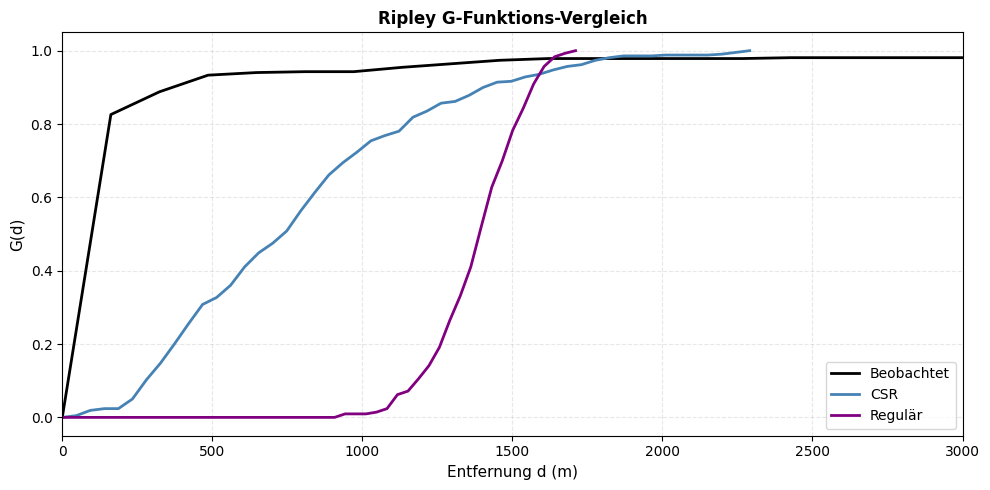


Interpretation:
  Beobachtet steigt viel schneller als CSR → starke Clusterung.
  Regulär steigt am langsamsten → gleichmäßige Verteilung.
  CSR dazwischen als Zufallsreferenz.


In [ ]:
# Ripley G-Funktion
print("Berechne G-Funktionen...")

########### Your code here ##############
# g_obs = 
# g_csr =
# g_reg =
#########################################
print("Fertig")

# Plotte G-Funktion
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(g_obs.support, g_obs.statistic, label='Beobachtet', color='black', linewidth=2)
ax.plot(g_csr.support, g_csr.statistic, label='CSR', color='steelblue', linewidth=2)
ax.plot(g_reg.support, g_reg.statistic, label='Regulär', color='purple', linewidth=2)
ax.set_xlabel('Entfernung d (m)', fontsize=11)
ax.set_ylabel('G(d)', fontsize=11)
ax.set_title('Ripley G-Funktions-Vergleich', fontsize=12, fontweight='bold')
ax.set_xlim(0, 3000)
ax.legend(fontsize=10)
ax.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.savefig('pic/ripley_g_obs_csr_reg.png', dpi=150)
plt.show()

print('\nInterpretation:')
print('  Beobachtet steigt viel schneller als CSR → starke Clusterung.')
print('  Regulär steigt am langsamsten → gleichmäßige Verteilung.')
print('  CSR dazwischen als Zufallsreferenz.')

## Ripley F-Funktions-Vergleich

Die F-Funktion (Leerraum-Funktion) analysiert Abstände von Zufallspunkten zum nächsten Musterpunkt. Anstiegsgeschwindigkeit von F(d):
- **Langsamer Anstieg** → Große Lücken (Clusterung)
- **Schneller Anstieg** → Keine signifikanten Lücken (Regularität)

In [ ]:
# Ripley F-Funktion (Leerraum)
print("Berechne F-Funktionen...")
########### Your code here ##############
# f_obs = 
# f_csr =
# f_reg
#########################################
print("Fertig")

Berechne F-Funktionen...
Fertig
Fertig


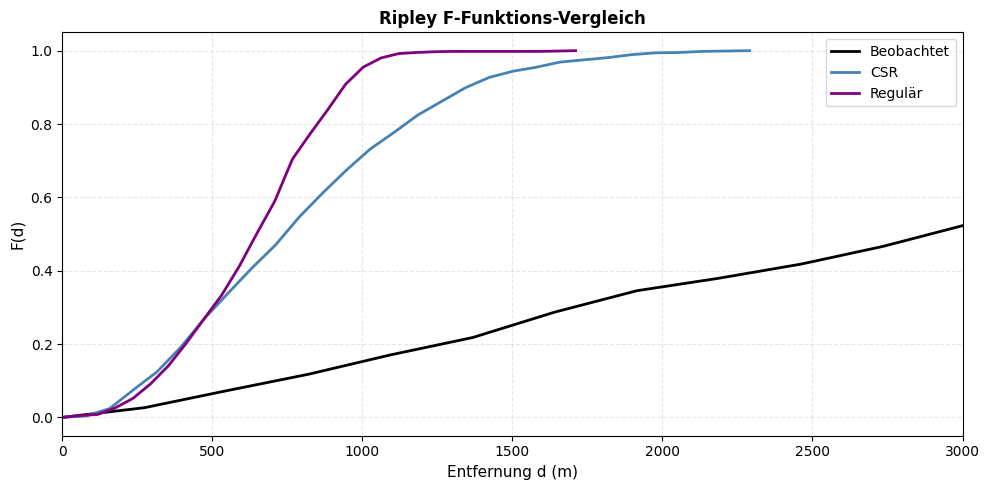


Interpretation:
  CSR dazwischen als Zufallsreferenz.
  Beobachtet steigt langsamer als CSR → größere Leerräume → Clusterung.
  Regulär steigt schneller → minimale große Lücken.


In [74]:
# Plotte F-Funktion
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(f_obs.support, f_obs.statistic, label='Beobachtet', color='black', linewidth=2)
ax.plot(f_csr.support, f_csr.statistic, label='CSR', color='steelblue', linewidth=2)
ax.plot(f_reg.support, f_reg.statistic, label='Regulär', color='purple', linewidth=2)
ax.set_xlabel('Entfernung d (m)', fontsize=11)
ax.set_ylabel('F(d)', fontsize=11)
ax.set_title('Ripley F-Funktions-Vergleich', fontsize=12, fontweight='bold')
ax.set_xlim(0, 3000)
ax.legend(fontsize=10)
ax.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.savefig('pic/ripley_f_obs_csr_reg.png', dpi=150)
plt.show()

print('\nInterpretation:')
print('  CSR dazwischen als Zufallsreferenz.')
print('  Beobachtet steigt langsamer als CSR → größere Leerräume → Clusterung.')
print('  Regulär steigt schneller → minimale große Lücken.')

## Ripley K-Funktions-Vergleich

Die K-Funktion zählt die Anzahl der Punktpaare innerhalb der Entfernung d. Vergleich mit theoretischer Erwartung $K_{CSR}(d) = \pi d^2$:
- $K(d) > \pi d^2$ → Clusterung
- $K(d) = \pi d^2$ → Zufällig
- $K(d) < \pi d^2$ → Regulär/verteilt

Berechne K-Funktionen ...
Fertig
Fertig


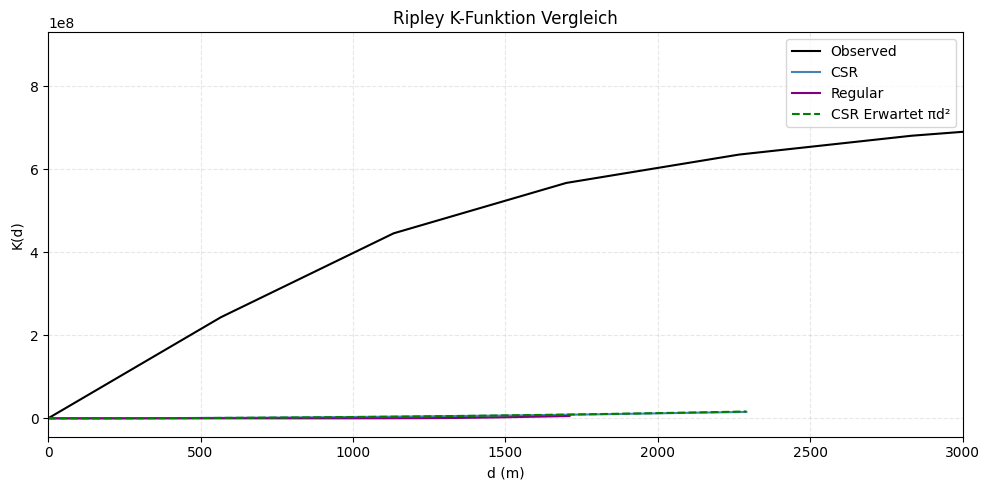


Interpretation K:
  Observed > Erwartet → mehr Nachbarn als Zufall → Cluster.
  Regular < Erwartet → weniger Paare → gleichmäßig.
  CSR ≈ Erwartet → Referenz.


In [ ]:
# Ripley K-Funktion
print("Berechne K-Funktionen ...")
########### Your code here ##############
# k_obs = 
# k_csr =
# k_reg =
#########################################
print("Fertig")

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(k_obs.support, k_obs.statistic, label='Observed', color='black')
ax.plot(k_csr.support, k_csr.statistic, label='CSR', color='steelblue')
ax.plot(k_reg.support, k_reg.statistic, label='Regular', color='purple')
expected = np.pi * k_csr.support**2
ax.plot(k_csr.support, expected, label='CSR Erwartet πd²', color='green', linestyle='--')
ax.set_xlabel('d (m)')
ax.set_ylabel('K(d)')
ax.set_xlim(0, 3000)
ax.set_title('Ripley K-Funktion Vergleich')
ax.legend(); ax.grid(alpha=0.3, linestyle='--')
plt.tight_layout(); plt.savefig('pic/ripley_k_obs_csr_reg.png', dpi=150); plt.show()

print('\nInterpretation K:')
print('  Observed > Erwartet → mehr Nachbarn als Zufall → Cluster.')
print('  Regular < Erwartet → weniger Paare → gleichmäßig.')
print('  CSR ≈ Erwartet → Referenz.')

## Ripley L-Funktions-Vergleich

Die L-Funktion ist die normalisierte K-Funktion: $L(d) = \sqrt{K(d)/\pi}$
- Für CSR ist die Erwartung $L(d) = d$
- $L(d) > d$ → Clusterung
- $L(d) = d$ → Zufällig
- $L(d) < d$ → Regulär/verteilt

Die L-Funktion ist einfacher zu interpretieren als die K-Funktion.

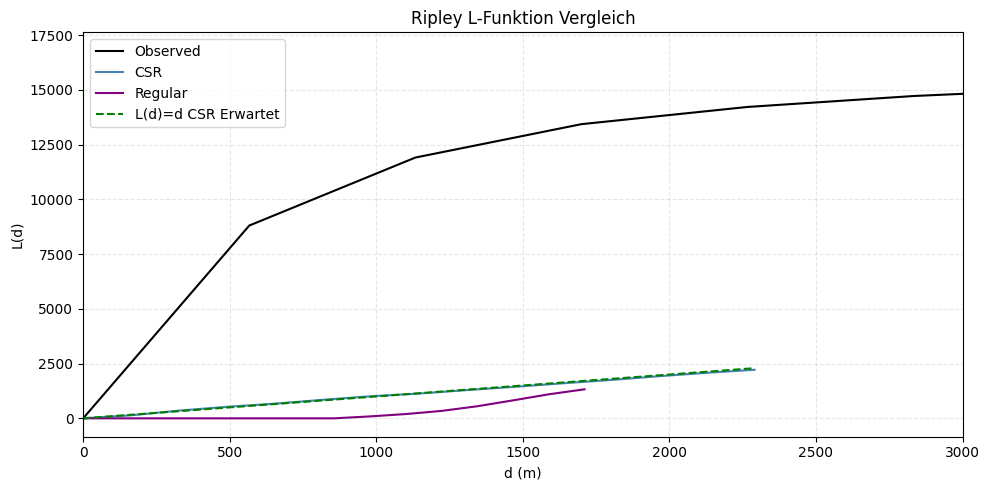


Interpretation L:
  Observed über der Linie → Cluster.
  Regular unter der Linie → Regularität.
  CSR nahe der Linie → Zufälligkeit.


In [ ]:
# Ripley L-Funktion (normalisierte K)
########### Your code here ##############
# L_obs = 
# L_csr =
# L_reg =
#########################################

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(k_obs.support, L_obs, label='Observed', color='black')
ax.plot(k_csr.support, L_csr, label='CSR', color='steelblue')
ax.plot(k_reg.support, L_reg, label='Regular', color='purple')
ax.plot(k_csr.support, k_csr.support, label='L(d)=d CSR Erwartet', color='green', linestyle='--')
ax.set_xlabel('d (m)')
ax.set_ylabel('L(d)')
ax.set_xlim(0, 3000)
ax.set_title('Ripley L-Funktion Vergleich')
ax.legend(); ax.grid(alpha=0.3, linestyle='--')
plt.tight_layout(); plt.savefig('pic/ripley_l_obs_csr_reg.png', dpi=150); plt.show()

print('\nInterpretation L:')
print('  Observed über der Linie → Cluster.')
print('  Regular unter der Linie → Regularität.')
print('  CSR nahe der Linie → Zufälligkeit.')

## Referenz
- Point Pattern Analysis — Geographic Data Science with Python (https://geographicdata.science/book/notebooks/08_point_pattern_analysis.html)
- distance_statistics (https://pysal.org/notebooks/explore/pointpats/distance_statistics.html)